In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.reuters import load_data, get_word_index
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam,RMSprop, SGD
warnings.filterwarnings('ignore')
%matplotlib inline

2025-05-29 08:37:03.268353: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-29 08:37:03.362644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748482623.403029   13171 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748482623.415743   13171 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-29 08:37:03.504863: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Tải dữ liệu và quan sát datasets

In [2]:
n_words = 1000
(X_train,y_train), (X_test, y_test) = load_data(num_words = n_words, test_split = 0.3)
n_train_size = X_train.shape[0]


In [3]:
#print data shape
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape:{}".format(y_train.shape))
print("-"*50)
print("Testing data X shape:{}".format(X_test.shape))
print("Testing data y shape:{}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (7859,)
Training data y shape:(7859,)
--------------------------------------------------
Testing data X shape:(3369,)
Testing data y shape:(3369,)
--------------------------------------------------


In [4]:
# Tách nhãn
n_cat = pd.Series(y_train).nunique()
n_cat

46

In [5]:
# Dòng 1 trong X_train
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [6]:
#Xem độ dài 100 văn bản đầu
print([len(a) for a in X_train[0:100]])

[87, 56, 139, 224, 101, 116, 100, 100, 82, 106, 31, 59, 65, 316, 527, 76, 114, 17, 91, 77, 231, 108, 83, 29, 95, 110, 23, 373, 114, 354, 133, 222, 571, 155, 83, 208, 170, 269, 74, 19, 23, 78, 21, 377, 104, 299, 89, 56, 94, 139, 118, 36, 137, 107, 83, 66, 70, 112, 88, 51, 83, 123, 17, 185, 84, 52, 102, 73, 106, 486, 107, 82, 263, 172, 491, 190, 143, 62, 26, 88, 114, 38, 85, 112, 793, 104, 25, 21, 101, 28, 25, 81, 135, 73, 62, 18, 90, 266, 91, 64]


In [7]:
#Download từ điển để ghép từ integer --> document
my_dict = get_word_index(path='reuters_word_index.json')

In [8]:
my_dict_inv = {v:k for k,v in my_dict.items()}

In [9]:
#Ghép và hiện 10 tin đầu
i_news = 10
news = list(pd.Series(X_train[i_news]).apply(lambda x:my_dict_inv[x]))
print(' '.join(news))

the federal gain only growth lt they meeting year reuter company did year an they of of reuter company of of 1987 had of of reuter had profits of pct dlrs


In [10]:
## Tiền xử lý dữ liệu

In [11]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [12]:
# Mã hoá one-hot
y = np.concatenate([y_train,y_test],axis=0)
y = to_categorical(y,46)
y_train = y[:n_train_size,:]
y_test = y[n_train_size:,:]


## Định nghĩa mô hình

In [18]:
n_neurons = 100
n_input = 100
my_model = Sequential()
my_model.add(Embedding(n_words, n_input)) #n_words = kích thước vocabl n_input - số chiều không gian embedding
my_model.add(LSTM(units = n_neurons, return_sequences = False, input_shape = (None,n_input), activation = 'tanh'))
my_model.add(Dense(n_cat,activation='softmax'))


In [19]:
my_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Dùng tối ưu Adam và biên dịch

In [24]:
n_epochs = 20
batch_size = 20
learn_rate = 0.001

In [22]:
#Tối ưu hóa lossfunction vớ phương pháp Adam
my_optimizer = Adam(learning_rate = learn_rate)
my_model.compile(loss="categorical_crossentropy", optimizer = my_optimizer, metrics = ["accuracy"])

## Huấn luyện mô hình

In [25]:
my_summary = my_model.fit(X_train,y_train, epochs=n_epochs, batch_size = batch_size, validation_split=0.2, verbose = 1)

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3805 - loss: 2.5677 - val_accuracy: 0.5159 - val_loss: 1.9202
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5108 - loss: 1.8775 - val_accuracy: 0.5140 - val_loss: 1.7523
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5323 - loss: 1.7782 - val_accuracy: 0.5719 - val_loss: 1.6572
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5770 - loss: 1.6385 - val_accuracy: 0.5967 - val_loss: 1.5565
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6199 - loss: 1.4665 - val_accuracy: 0.6622 - val_loss: 1.3813
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6603 - loss: 1.3131 - val_accuracy: 0.6673 - val_loss: 1.3219
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6890 - loss: 1.2015 - val_accuracy: 0.6902 - val_loss: 1.2775
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7199 - loss: 1.0970 - val_accu

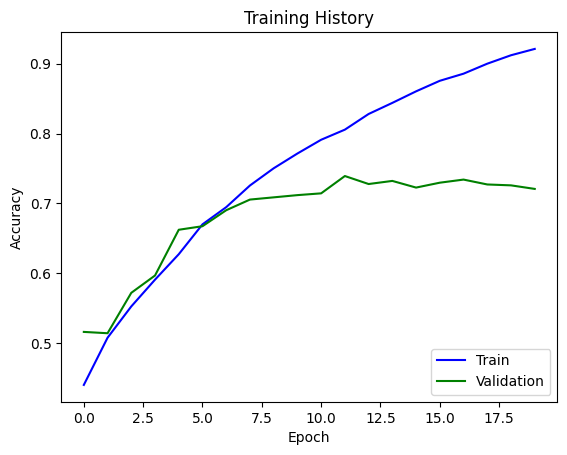

In [26]:
plt.plot(my_summary.history['accuracy'], c="b")
plt.plot(my_summary.history['val_accuracy'],c="g")
plt.title("Training History")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Validation'],loc = 'lower right')
plt.show()

## Kiểm tra, evaluate

In [28]:
ACC = my_model.evaluate(X_test, y_test, verbose=1)[1]
print("Test Accuracy:{}".format(np.round(ACC,3)))

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7043 - loss: 1.5139 
Test Accuracy:0.701
